In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import StandardScaler
 

In [2]:
df=pd.read_csv('Downloads/car data.csv')

In [3]:
df.columns=[x.lower() for x in df.columns]
df.corr()



,year,selling_price,present_price,kms_driven,owner
year,1.000000,0.236141,-0.047584,-0.524342,-0.182104
selling_price,0.236141,1.000000,0.878983,0.029187,-0.088344
present_price,-0.047584,0.878983,1.000000,0.203647,0.008057
kms_driven,-0.524342,0.029187,0.203647,1.000000,0.089216
owner,-0.182104,-0.088344,0.008057,0.089216,1.000000


In [4]:
nomv=df.dropna(axis=0)
#nomv["seller_type"]=nomv["seller_type"].map({"Individual":0,"Dealer":1})
#nomv["fuel_type"] =nomv['fuel_type'].map({"Petrol":1,"Diesel":0})
#nomv["transmission"]=nomv["transmission"].map({"Manual":1,"Automatic":1})
q=nomv["selling_price"].quantile(0.999)
dta1=nomv[nomv["selling_price"]<q]


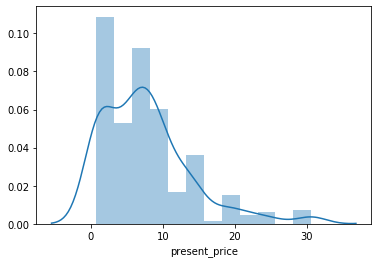

In [5]:
q2=dta1["present_price"].quantile(0.99)
q3=dta1["present_price"].quantile(0.1)
dta2=dta1[dta1["present_price"]<q2]
dta3=dta2[dta2["present_price"]>q3]
sns.distplot(dta3["present_price"])


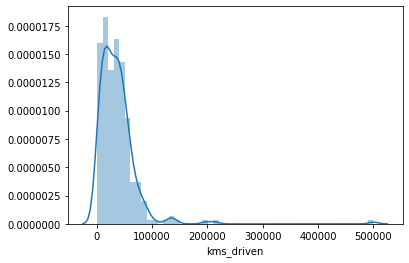

In [6]:
sns.distplot(df["kms_driven"])

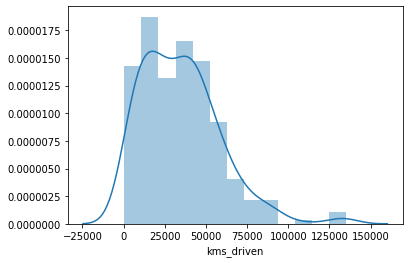

In [7]:
q4=dta3["kms_driven"].quantile(0.99)
dta4=dta3[dta3["kms_driven"]<q4]
sns.distplot(dta4["kms_driven"])


In [8]:
cleaned=dta4

In [9]:
cleaned.head(10)


,car_name,year,selling_price,present_price,kms_driven,fuel_type,seller_type,transmission,owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


In [10]:
x=cleaned.drop(["selling_price","car_name","year"],axis=1)
y=cleaned["selling_price"]
xdummies=pd.get_dummies(x,drop_first=True)
xdummies["year"]=cleaned["year"]


In [11]:
#scaler=StandardScaler().fit(x)
#ind=scaler.fit(x).transform(x)

cleaned["selling_price"]=np.log(cleaned["selling_price"])
y=cleaned["selling_price"]

D:\anacondaaa\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


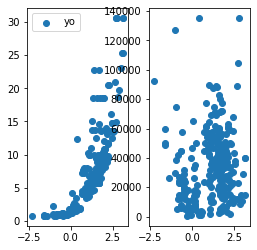

In [12]:
fig,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(4,4))
ax1.scatter(cleaned["selling_price"],cleaned["present_price"],label="yo")
ax1.legend()
ax2.scatter(cleaned["selling_price"],cleaned["kms_driven"])
plt.show()


In [13]:
scaler=StandardScaler().fit(xdummies)
ind=scaler.fit(xdummies).transform(xdummies)


In [14]:
xtrain,xtest,ytrain,ytest=train_test_split(ind,y,test_size=0.2,shuffle=False,random_state=42)

In [15]:
reg=LinearRegression()
mymodel=reg.fit(xtrain,ytrain)


# statistics of my model

In [16]:
coefficeints=mymodel.coef_
intercept=mymodel.intercept_
r_squared=mymodel.score(xtrain,ytrain)
p_values=f_regression(xtrain,ytrain)[1].round(3)
adj_r2=1-(1-r_squared)*(173-1)/172
lst={"coefficeints":coefficeints,"intercept":intercept,"r_squared":r_squared,"pvalues":p_values,"adjusted_values":adj_r2}
lst

{'coefficeints': array([ 0.5143377 , -0.05912356, -0.00568283,  0.11966678,  0.03762139,
        -0.5609449 ,  0.02301956,  0.28143565]),
 'intercept': 1.0969347692544482,
 'r_squared': 0.9190627298316814,
 'pvalues': array([0.   , 0.015, 0.223, 0.   , 0.   , 0.   , 0.   , 0.   ]),
 'adjusted_values': 0.9190627298316814}

# plotting my predicted selling_price against the given selling_price

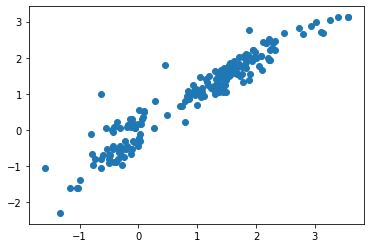

In [17]:
pred=mymodel.predict(xtrain)
plt.scatter(pred,ytrain)

In [18]:
pd.options.display.max_rows=900
ccc=pd.DataFrame({"p":pred,"y":ytrain,"difference":pred-ytrain})
ccc.describe(include="all")

,p,y,difference
count,210.000000,210.000000,2.100000e+02
mean,0.956058,0.956058,-2.648675e-16
std,1.080562,1.127138,3.206648e-01
min,-1.592269,-2.302585,-1.652082e+00
25%,-0.103567,0.060420,-1.932312e-01
50%,1.280765,1.178655,9.290729e-03
75%,1.688392,1.764296,2.183490e-01
max,3.565179,3.135494,9.740860e-01


In [19]:
#tpred=mymodel.predict(xtest)
#plt.scatter(ytest,tpred)

# plotting my test data

In [20]:
#plt.scatter(ytest,tpred)

In [21]:
new=nomv.drop(["selling_price"],axis=1)
xdummies.shape

(263, 8)

In [22]:
newmodel=reg.fit(xdummies,y)
newmodel.score(xdummies,y)

0.9253937170052711

In [23]:
from sklearn import metrics
from sklearn.model_selection import cross_validate
scoree=cross_validate(newmodel,xdummies,y,cv=15,return_estimator=True)


In [24]:
dumpred=newmodel.predict(xdummies)
1-np.square(dumpred-y).sum()/((y-y.mean())**2).sum()
[newmodel.intercept_,
newmodel.coef_]

[-208.56965757424015,
 array([ 8.24509330e-02, -2.49038236e-06, -4.67721059e-02,  3.03901454e-01,
         1.22312260e-01, -1.28153890e+00,  4.92463778e-02,  1.03938490e-01])]

In [25]:
#print(scoree['score'])
li=[]
for modee in scoree['estimator']:
    for i in modee.coef_:
        print(i)
        li.append(i)

0.08232781169460662
-2.4273667163077235e-06
-0.04624982518047321
0.3080272438833798
0.12300905980772053
-1.2822486066233711
0.06045877314080012
0.10494307827966988
0.08081019188060534
-2.597329640301739e-06
-0.047160093387312786
0.09698899090080358
-0.09698899090080368
-1.3143612090177677
0.05293490405841151
0.10172015202932204
0.08024983124209685
-3.816581757417618e-06
-0.049458464425679055
0.3234982006761155
0.13186845150946358
-1.3480617113026194
0.05648484021048319
0.10142121269015787
0.08266018360295123
-2.8298591571868336e-06
-0.03998182105218772
0.30611707496853185
0.12818883209496187
-1.3197726488098662
0.04617955444238268
0.10882507765448801
0.09132605444580993
-2.3587869753600903e-06
-0.042633897753421766
0.2755701321841992
0.1133042067046061
-1.2281089884541632
-0.03648874250147363
0.10071317334940974
0.08184771178021392
-2.227966999469307e-06
-0.10785712396543755
0.3154625526405815
0.13080595275320892
-1.3696918442686694
0.04643687670232537
0.09855155075227418
0.08200576576

In [26]:
#nval=newmodel.predict(xdummies)
scoree['test_score']

array([  0.83095345,   0.02125463,   0.8525307 ,   0.23154445,
         0.64697204,   0.72367115,  -5.21112757, -14.19145227,
        -2.4603005 ,   0.9245311 ,   0.70166686,   0.76487972,
         0.89415045,   0.90504078,   0.90044949])

In [27]:
#vall=np.exp(nval)
li[72:80]


[0.08169979855857104,
 -2.1209935079082886e-06,
 -0.11347937324184697,
 0.30899522760077425,
 0.12451492257368332,
 -1.2523757252181162,
 0.05509765125250741,
 0.09959001495208546]

In [28]:
#newpd=pd.DataFrame(vall,columns=["selling_price"])
#newpd.shape

In [29]:
#submit=pd.concat([newpd,new],axis=1,ignore_index=True)
#nomv.columns

In [30]:
#submit.columns=["selling_price","car_name","year","present_price","kms_driven","fuel_type","seller_type","transmission","owner"]

In [31]:
#submit=submit.reindex(columns=["car_name","year","selling_price","present_price","kms_driven","fuel_type","seller_type","transmission","owner"])

In [32]:
#submit.to_csv("Car_dekho_linear_reg.csv")

"""final_submit=submit[["car_name","selling_price"]]
final_submit=final_submit.dropna(axis=0)
final_submit.isnull().sum()"""

'final_submit=submit[["car_name","selling_price"]]\nfinal_submit=final_submit.dropna(axis=0)\nfinal_submit.isnull().sum()'

In [33]:
#final_submit.to_csv("linear_reg_car dekho.csv")

In [34]:
#final_submit.isnull().sum()